Exploratory Data structure

1. ASk meaningful questions abou the dataset before analysis .
  
         1.what are the different columns and thier data types ?

         2.what is the distribution of review ratings

  3. Are there any missing or null values in key columns ?

   4. Are there duplicate rows in the dataset

  5. which are the top 5 most reviewed products ?

2. Explore the Data structure

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazondata.csv to amazondata.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('amazondata.csv')

In [ ]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)

                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

3.Identify Trends,patterns and anomalies

Ratings distribution

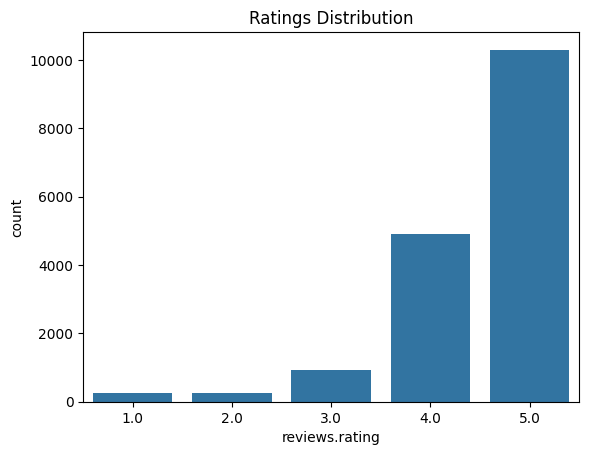

In [ ]:
sns.countplot(x='reviews.rating',data = df)
plt.title("Ratings Distribution")
plt.show()

Top 5 most reviewed products

In [ ]:
top_products = df['name'].value_counts().head(5)
display(top_products)

,count
name,
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",10966
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",2814
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",1130
"Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,",1038
"All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers,,",212


Average rating for this brand

In [10]:
avg_brand = df.groupby('brand')['reviews.rating'].mean().sort_values(ascending = False).head(10)
display(avg_brand)

,reviews.rating
brand,
Amazon,4.488846


3. Hypothesis testing & visual validation

In [13]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype('bool')

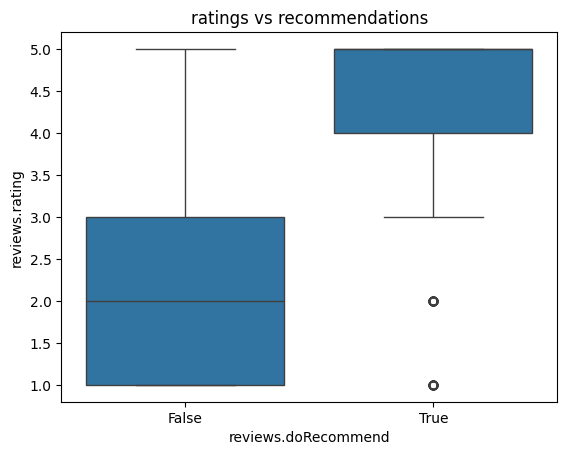

In [16]:
sns.boxplot(x='reviews.doRecommend', y='reviews.rating',data = df)
plt.title('ratings vs recommendations')
plt.show()

In [25]:
from scipy.stats import ttest_ind

df['reviews.doRecommend']=df['reviews.doRecommend'].astype(str).str.lower()=='true'
r=df[df['reviews.doRecommend']]['reviews.rating']
n=df[~df['reviews.doRecommend']]['reviews.rating']
ttest_ind(r,n,nan_policy='omit', equal_var = False)

TtestResult(statistic=np.float64(58.12835653913158), pvalue=np.float64(1.0381635476816144e-288), df=np.float64(796.1459842602453))

 Result:
    There is a strong & significant difference in product ratings between customers who recommend the product and those who don't

    people who recommend the product tend to give higher ratings

5.Detect potential issues


In [19]:
missing = df.isnull().sum()
display(missing[missing>0])

,0
asins,2
reviews.date,13
reviews.dateAdded,1692
reviews.didPurchase,16659
reviews.id,16659
reviews.numHelpful,430
reviews.rating,28
reviews.text,1
reviews.title,1
reviews.userCity,16659


In [21]:
invalid = df[df['reviews.rating'].between(1,5)]
display(invalid)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16654,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2016-11-17T00:00:00.000Z,2017-06-21T07:38:04Z,"2017-06-04T02:17:19.066Z,2017-06-03T18:41:39.716Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5026300/review...,Not only is it an excellent first tablet for a...,Excellent 1st tablet for a child!,NaN,NaN,ilarryslady
16655,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2016-11-17T00:00:00.000Z,2017-06-21T07:38:04Z,"2017-06-04T02:17:19.066Z,2017-06-03T18:41:39.716Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,"Love this tablet, great value, come with great...",Awesome tablet for younger kids under 10,NaN,NaN,Momof5
16656,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2016-11-16T00:00:00.000Z,2017-06-21T07:38:04Z,"2017-06-04T02:17:19.066Z,2017-06-03T18:41:39.716Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,Wonderful product to ha

In [22]:
duplicates = df.duplicated().sum()
print("Duplicates:",duplicates)

Duplicates: 0
